In [10]:
import sys
sys.path.append('/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/final/GP_models')
sys.path.append('/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower')
import helper
import numpy as np
from onset_detection import detected_samples
import matplotlib.pyplot as plt

import scipy.io.wavfile as wav
from datetime import datetime
import least_squares
from librosa import note_to_hz as hz
import sys
sys.path.append('/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/midi')
from midi import process_midi_to_note_info, notes_to_chords, dict_to_frequency_list, plot_piece



In [11]:
beethoven_chords = [['E4', 'G#4', 'B4', 'E5', 'G#5'],
                    ['B#3', 'D#4', 'F#4', 'A4', 'D#5', 'F#5'], ['C#4', 'E4', 'G#4', 'C#5', 'D#5'], ['G#3', 'B#3', 'D#4', 'F#4', 'B#4', 'D#5']]
beethoven_freqs = [hz(notes) for notes in beethoven_chords]

/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/GP_models/onset_detection.py:13: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wav.read(path)


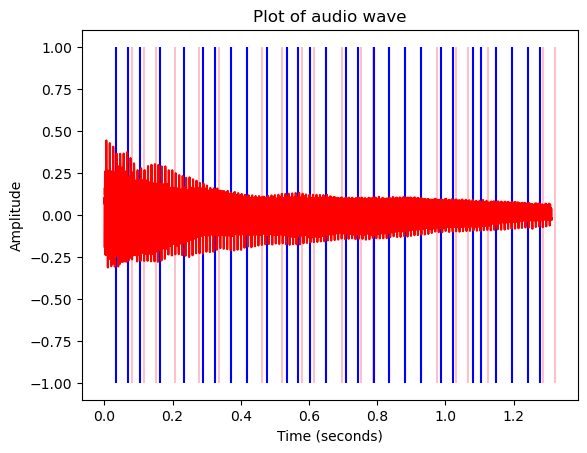

In [13]:
link = '/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/wav_files/G_196_D_293.wav'
sample_data, sample_rate, onset_times = detected_samples(
link, sample_length=2000, offset=0, show=True, delta=0.01, num_samples=200000, normalise=False)
plt.show()
time_samples = np.linspace(
    0, len(sample_data[0])/sample_rate, len(sample_data[0]))




In [14]:
sample = sample_data[0]
f=[196, 293]
T=4.065
v=2.07
sigma_n = 0.001
M=9

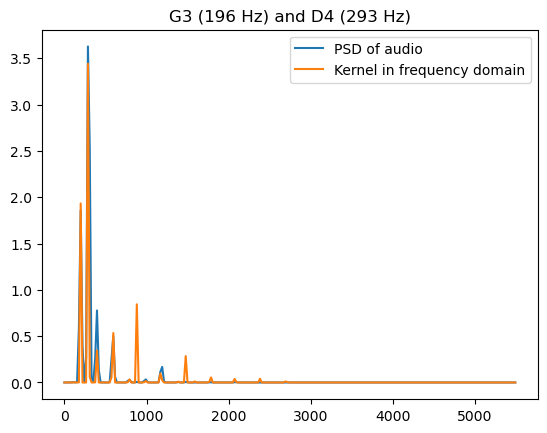

[0.21622404 0.78377596]
Without weightings 2398.300132700985
With least squares amplitude weightings 2415.746693070897


In [17]:
no_amp = -helper.relative_nlml(time_samples, sample, M=10,sigma_f=10,  f=f,T=0.465,v=2.37,normalised=True, amplitude=[1,1,1],sigma_n=sigma_n)
opt_amplitude = least_squares.opt_amplitude(sample,f=f, M=M, sigma_f=5, show=True,T=T,v=v )[0]
plt.title("G3 (196 Hz) and D4 (293 Hz)")
plt.show()
summed = np.sum(opt_amplitude)
print(opt_amplitude/summed)
print("Without weightings",-helper.stable_nlml(time_samples, sample_data[0], M=10, f=f,sigma_f = 0.005, T=T,v=v, amplitude=[0.5,0.5]))
print("With least squares amplitude weightings",-helper.stable_nlml(time_samples, sample, M=10, f=f,sigma_f = 0.005, T=T,v=v, amplitude=opt_amplitude/summed))
